# Milestone 2: Data collection, preprocessing, exploratory analysis
### On Tonal ambiguity and harmonic structure in Debussy’s piano music
#### By Ludovica Schaerf, Sabrina Laneve , Yuanhui Lin, Raphael Levier.

The notebook is articulated as follows:
1. [Gathering the data](#Gathering-the-data)
2. [Data format](#Data-format)
3. [Exploratory analysis](#Exploratory-analysis)

### Gathering the data

Here you can show that you understand your data and know how to use it. You can be brief in your answers. Section 1 may be supported with informative plots.
-	Describe the dataset you selected and the information represented in it.
-	Based on your research question(s), why did you select this dataset?
-	What aspects of the researched phenomena does the data (not) represent?
-	Where did you get your data from?
-	How did you get it?
-	What is the maximum available amount in theory (in the case of incomplete data acquisition)?
-   If working on partial data, how representative is your sample for the full dataset?


A complete harmonic analysis of Debussy's piano music would theoretically include all Debussy's piano works. However, considering that we want to identify which structures present in the pieces better characterise his style and determine tonal ambiguity, we favor the possibility of an in-depth interpretation of our results based on pivotal pieces.
The main focus of our analysis will be on the piano works which are commonly considered the most representative of Debussy's Impressionistic style: Estampes, Images and Preludes.(Webb, Barbara Ellen, "Impressionism in the Piano Music of Claude Debussy" 1962, Masters Theses,4728.https://thekeep.eiu.edu/theses/4728). Secondly, we will look at other works, in particular some earlier ones (Suite Bergamasque, Deux Arabesques) in order to make relevant comparisons. 
We collected the MIDI files of all the pieces of the aforementioned works from [musescore]() and from [this website](). The MIDI scores contain all necessary information to obtain wavescapes. They do not contain harmonic annotations: where appropriate we will manually add harmonic any features that we cannot extract using DFT.

### Data format

This section and the following are the main reason why this milestone is to be delivered in a Jupyter notebook: Give insightful examples for each one of the following questions by loading and transforming data samples.
-	What format(s) does the raw data come in?
-	How is the information that the dataset represents encoded in this format?
-	Load your dataset and show examples of how you access the information that you are interested in.
-	Give an overview of your dataset by plotting some basic statistics of the relevant features and/or metadata.


### Exploratory analysis

Perform an exploratory analysis on your data. In this section of your report please address the following points:
-	Which analyses or experiments did you perform as part of your exploratory analysis of the data and what are the results? Choose suitable visualizations to show your results.
-	How do the results relate to your hypotheses?
-	Did you find interesting or unexpected things? How do they influence the development of your project?
-	What are problems that you encountered? How could you plan to deal with them?
-	Discuss how the data enables you to answer your research question(s).
-	Formulate educated guesses on your outcomes based on this data.
-	Reflect on how, at the end of the analysis, you will be able to tell whether these outcomes have manifested or not and how confident you will possibly be about this assessment.



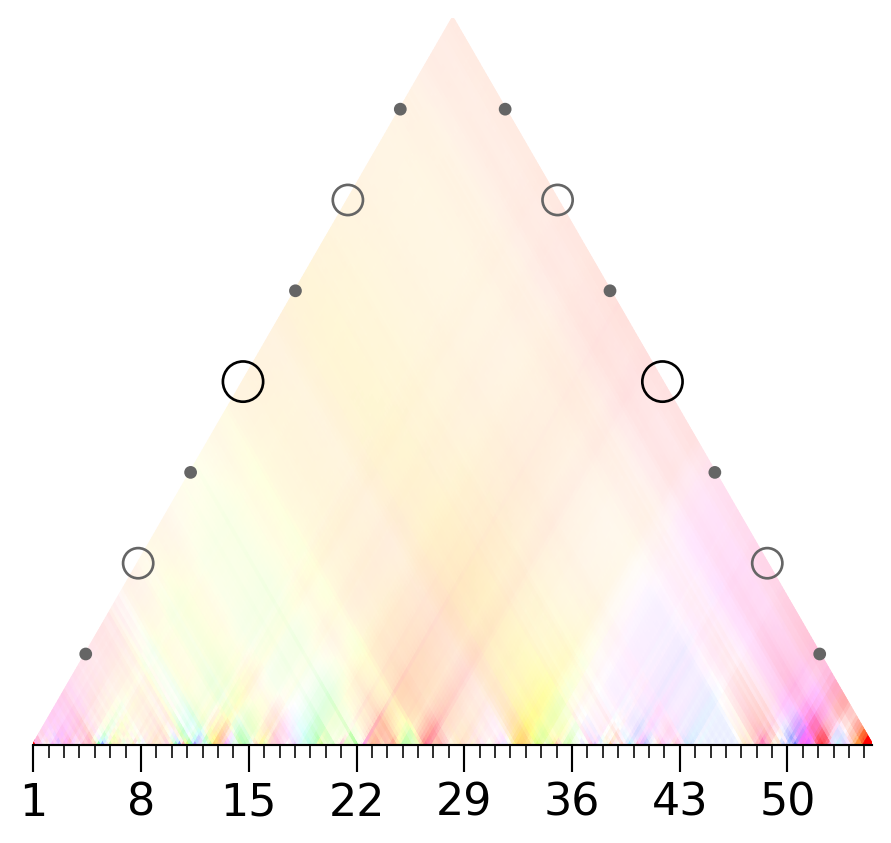

In [3]:
from wavescapes import *
from matplotlib import pyplot as plt

# transforms the MIDI Files into a list of pitch class distribution, each corresponding to a slice of one quarter note from the file.
pc_mat = produce_pitch_class_matrix_from_filename(filepath = 'etude_01_(c)lefeldt.mid', aw_size = 1.5)
# the DFT is applied to each of the pitch class distribution
fourier_mat = apply_dft_to_pitch_class_matrix(pc_mat)

# only the third Fourier coefficient is kept from the previous result and the matrix holding all color coded measurement is built
coeff_mat = complex_utm_to_ws_utm(fourier_mat, coeff=3)

# an instance of a class that allows the drawing of the previous matrix of colors is produced with the resolution being indicated as 500 pixels in width.
ws = Wavescape(coeff_mat, pixel_width=500)

# this draw the plot as an matplotlib figure. If called on a noteboot, this will display the figure at the end of the cell.
ws.draw(tick_ratio=4)

# saves the figure drawn as PNG image.
plt.savefig('3rd_coeff_wavescape.png')

In [ ]:
fourier_mat

Debussy_-_Suite_Bergamasque_-_I
Debussy_-_Suite_Bergamasque_-_II
Debussy_-_Suite_Bergamasque_-_III
Debussy_-_Suite_Bergamasque_-_VI
images_1_1_(c)oguri
images_1_2_(c)oguri
images_1_3_(c)oguri (1)
images_2_1_(c)galimberti
images_2_2_(c)galimberti


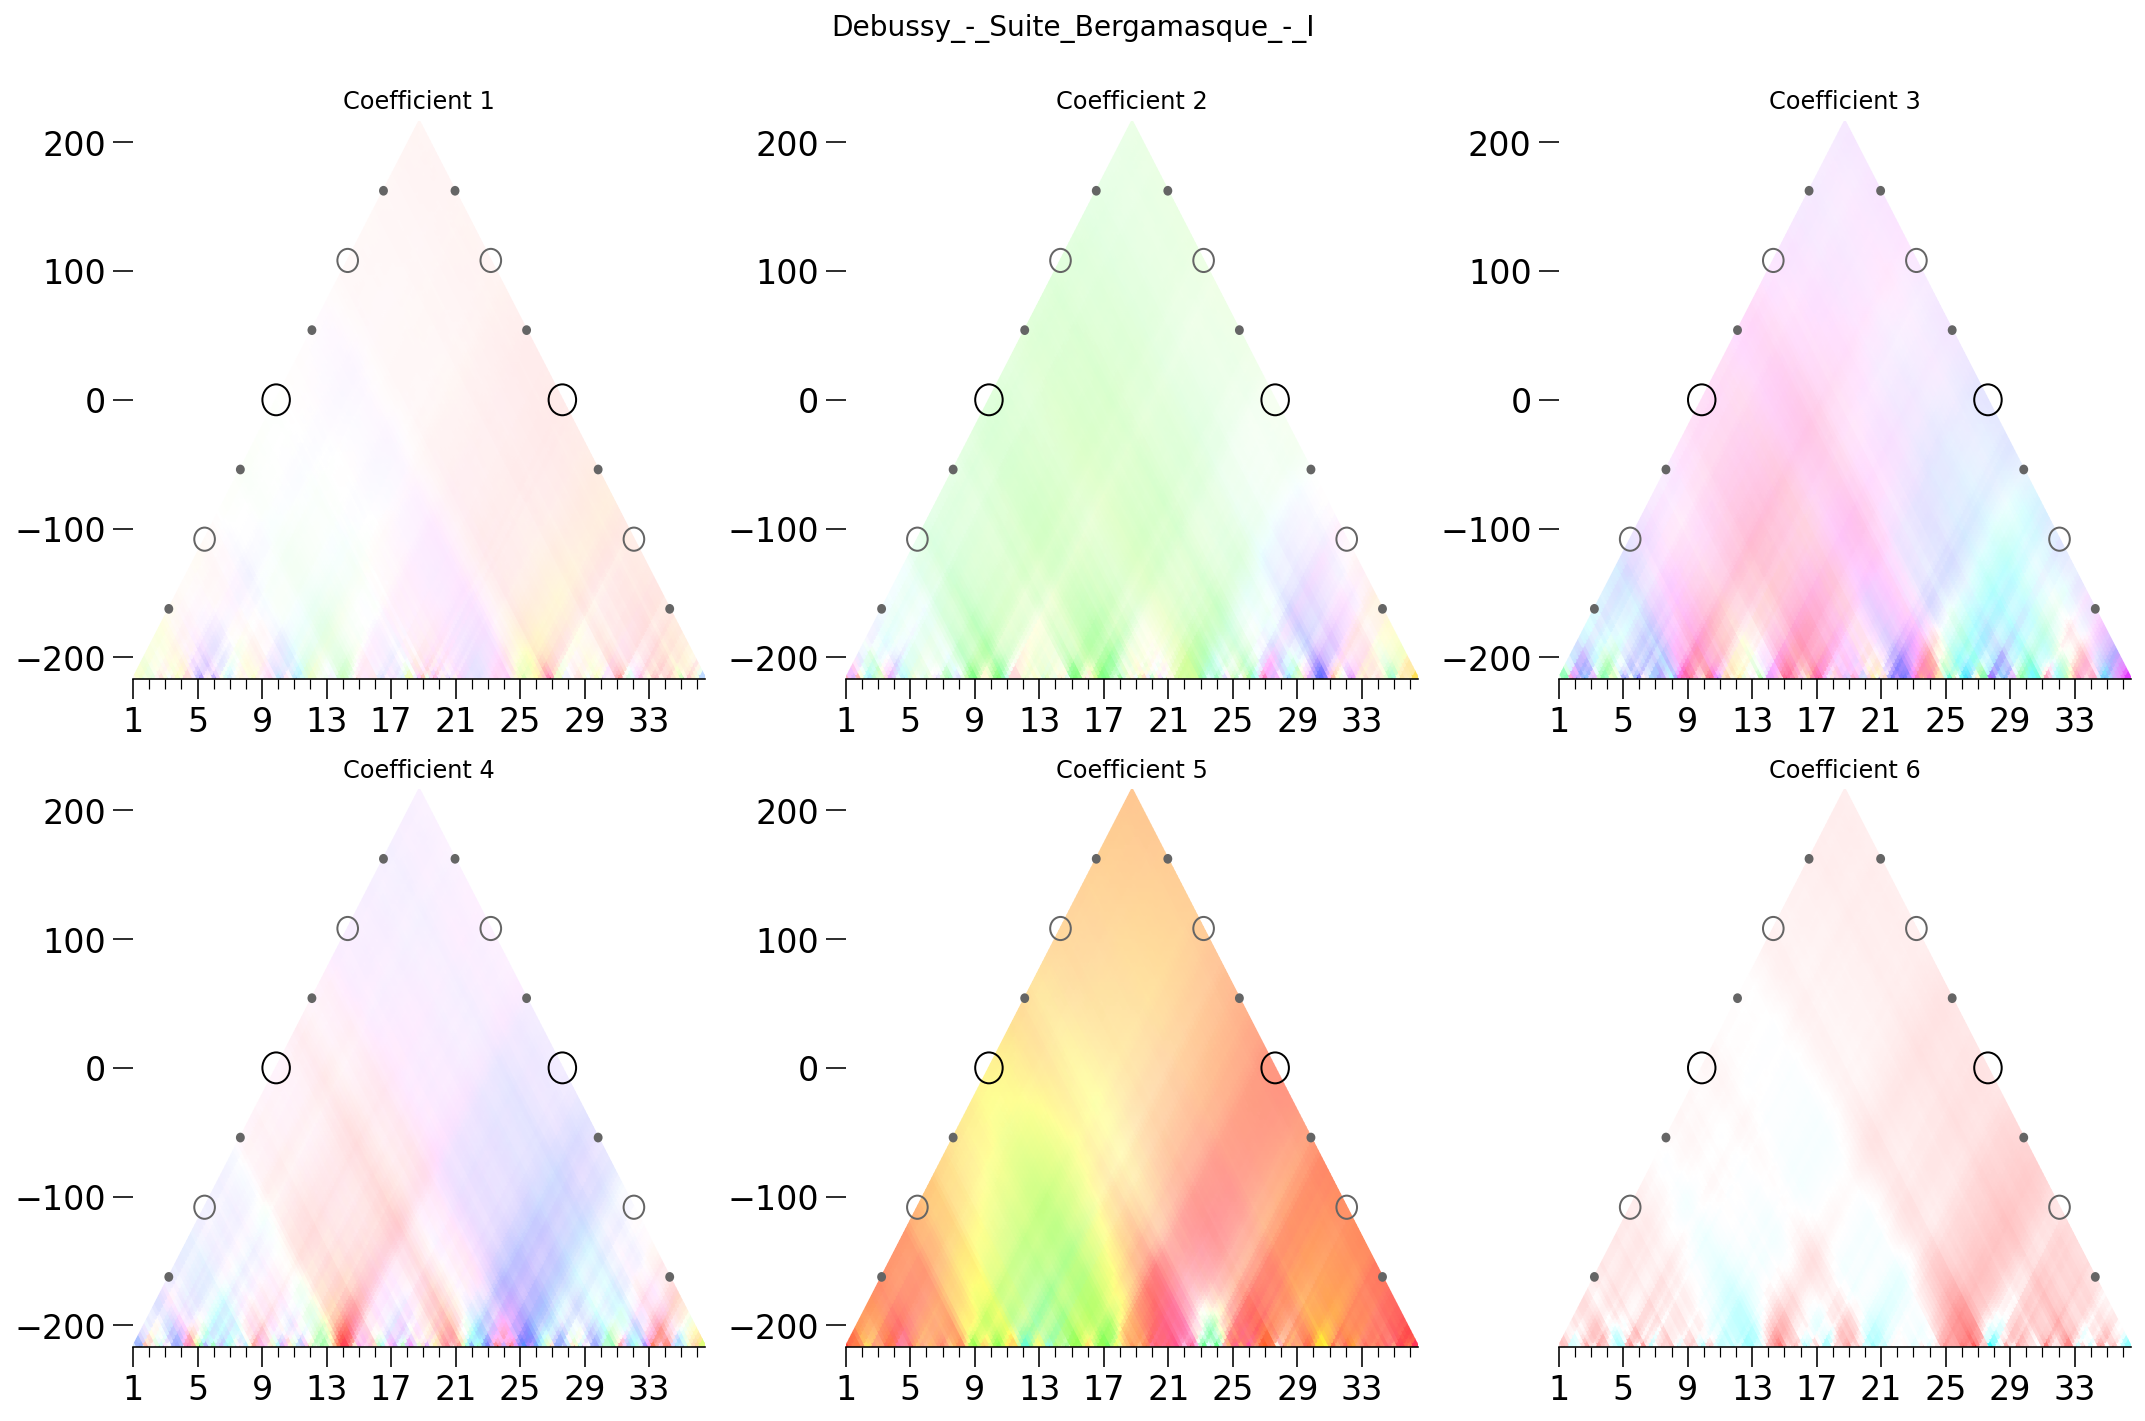

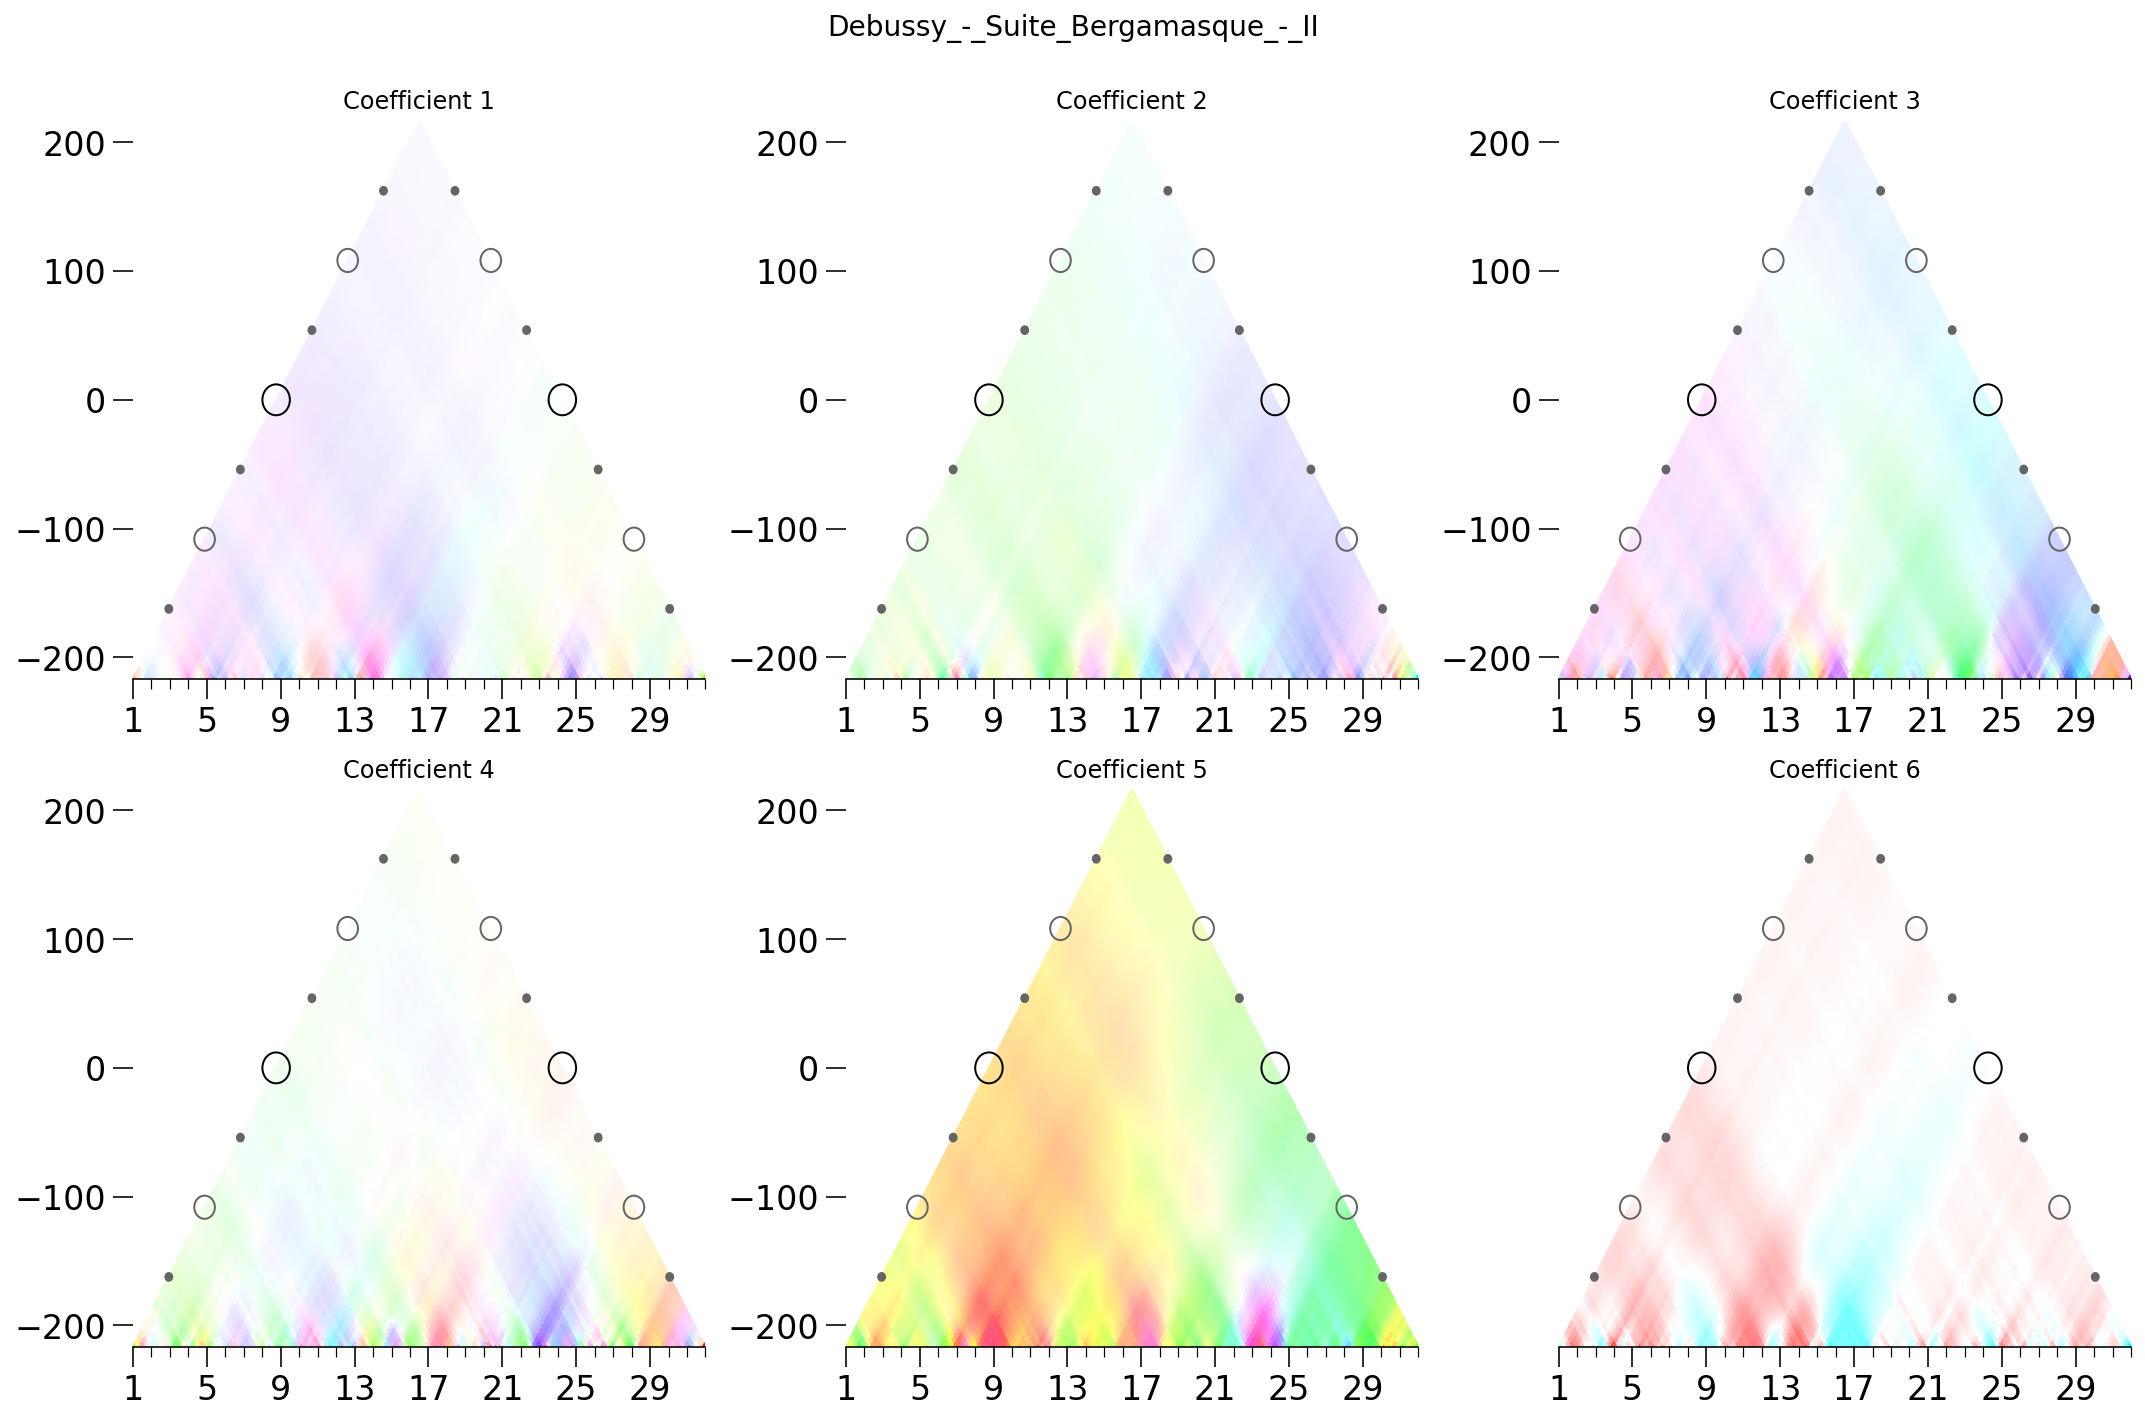

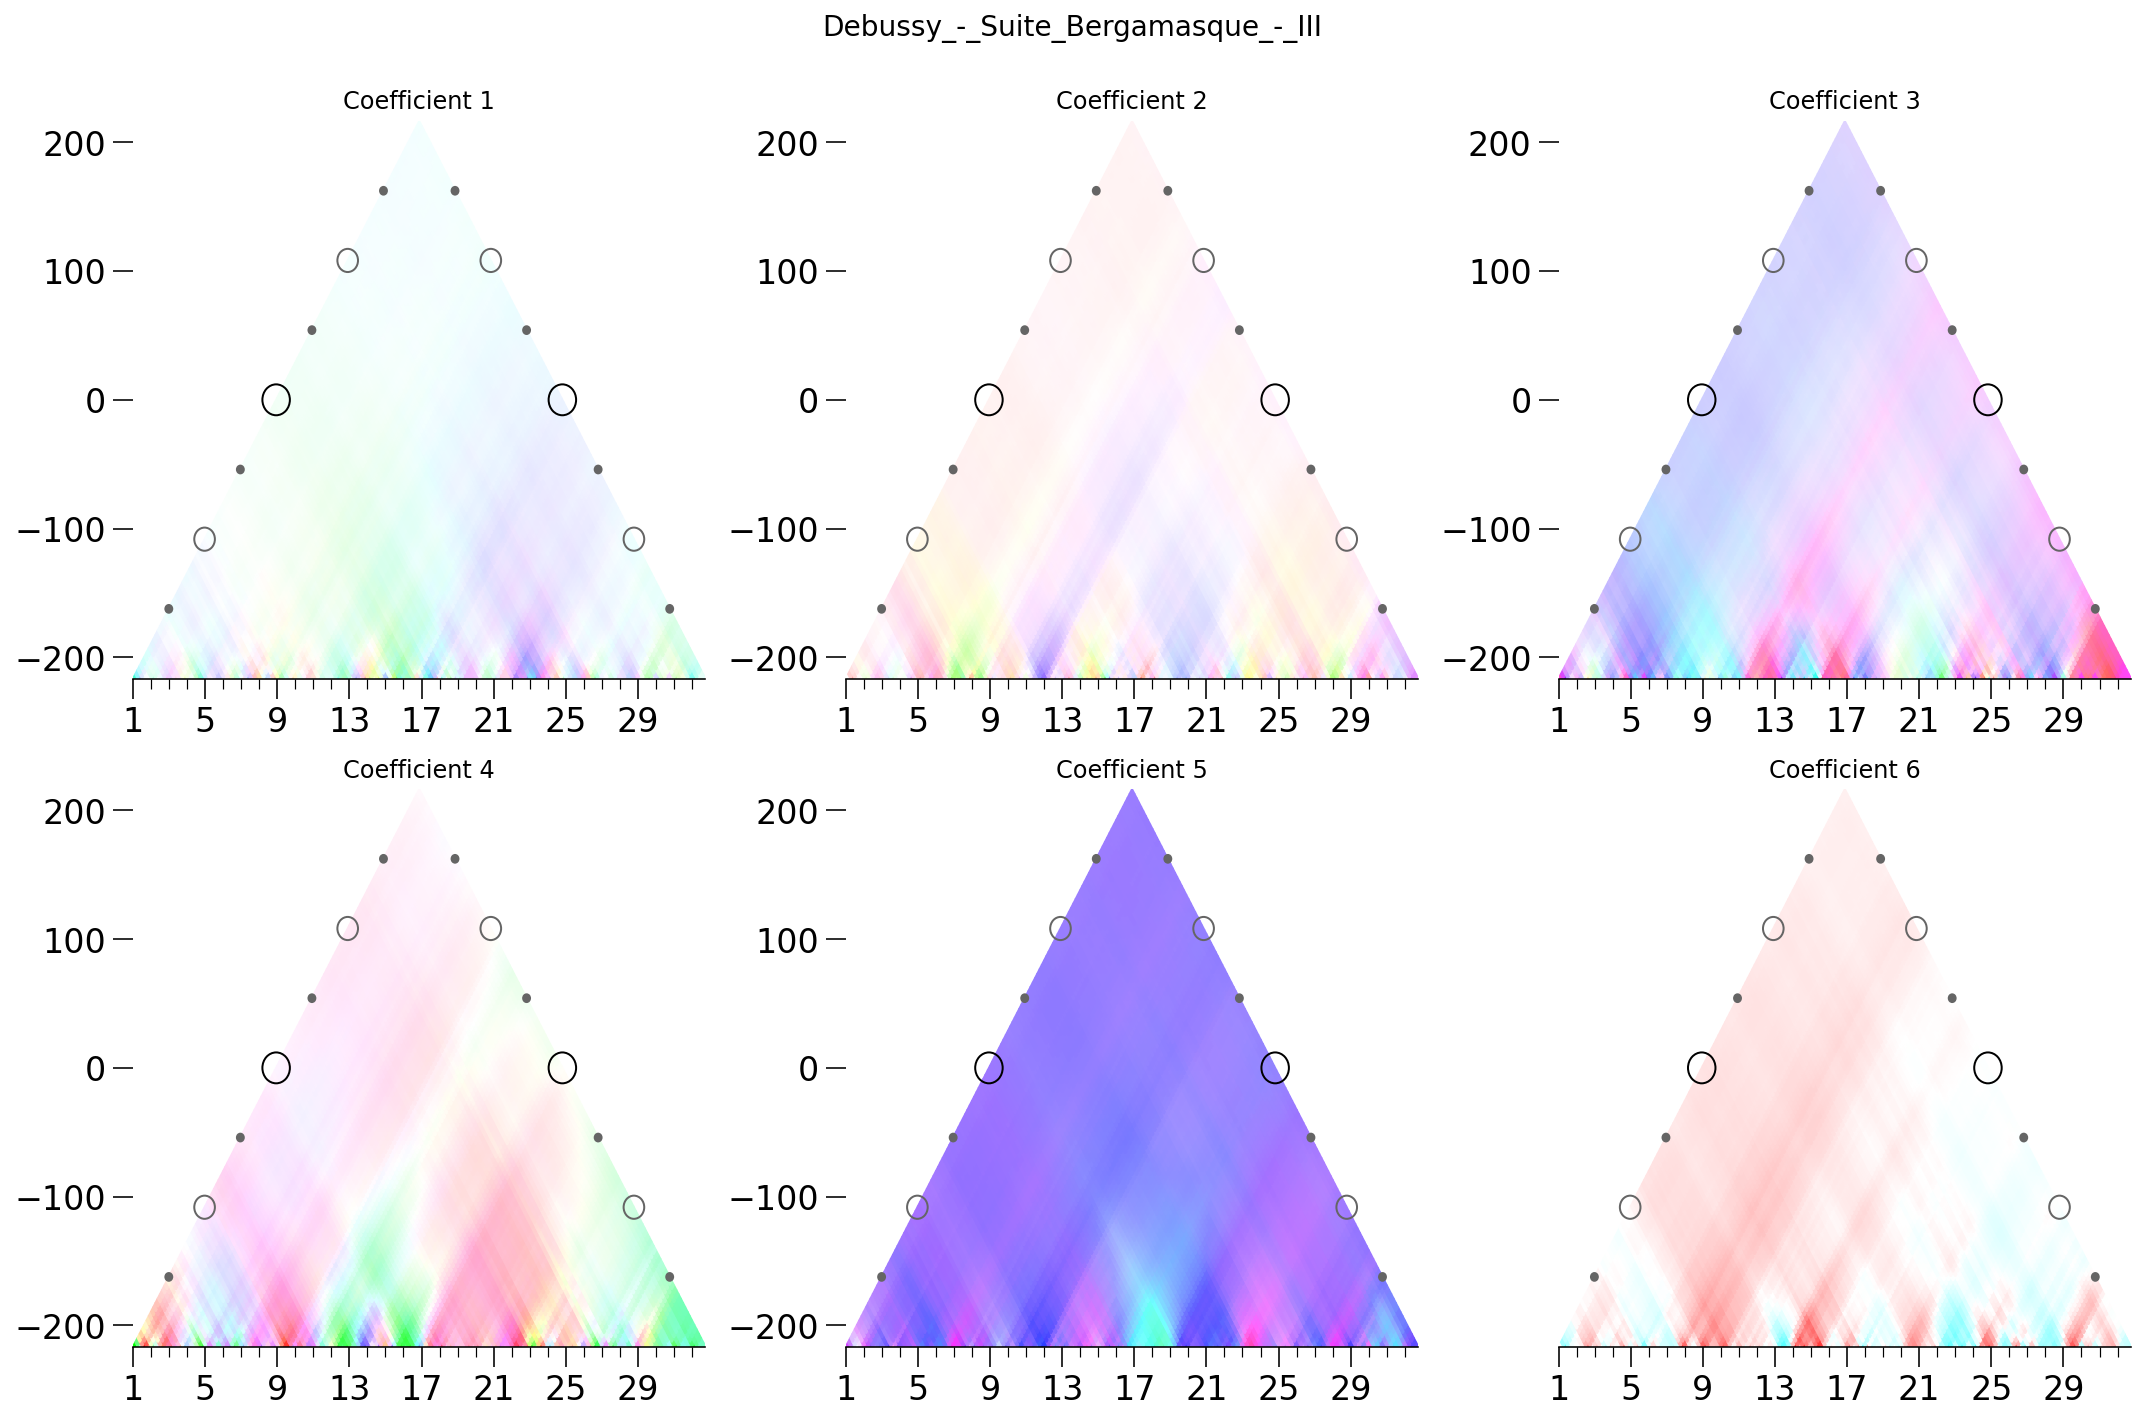

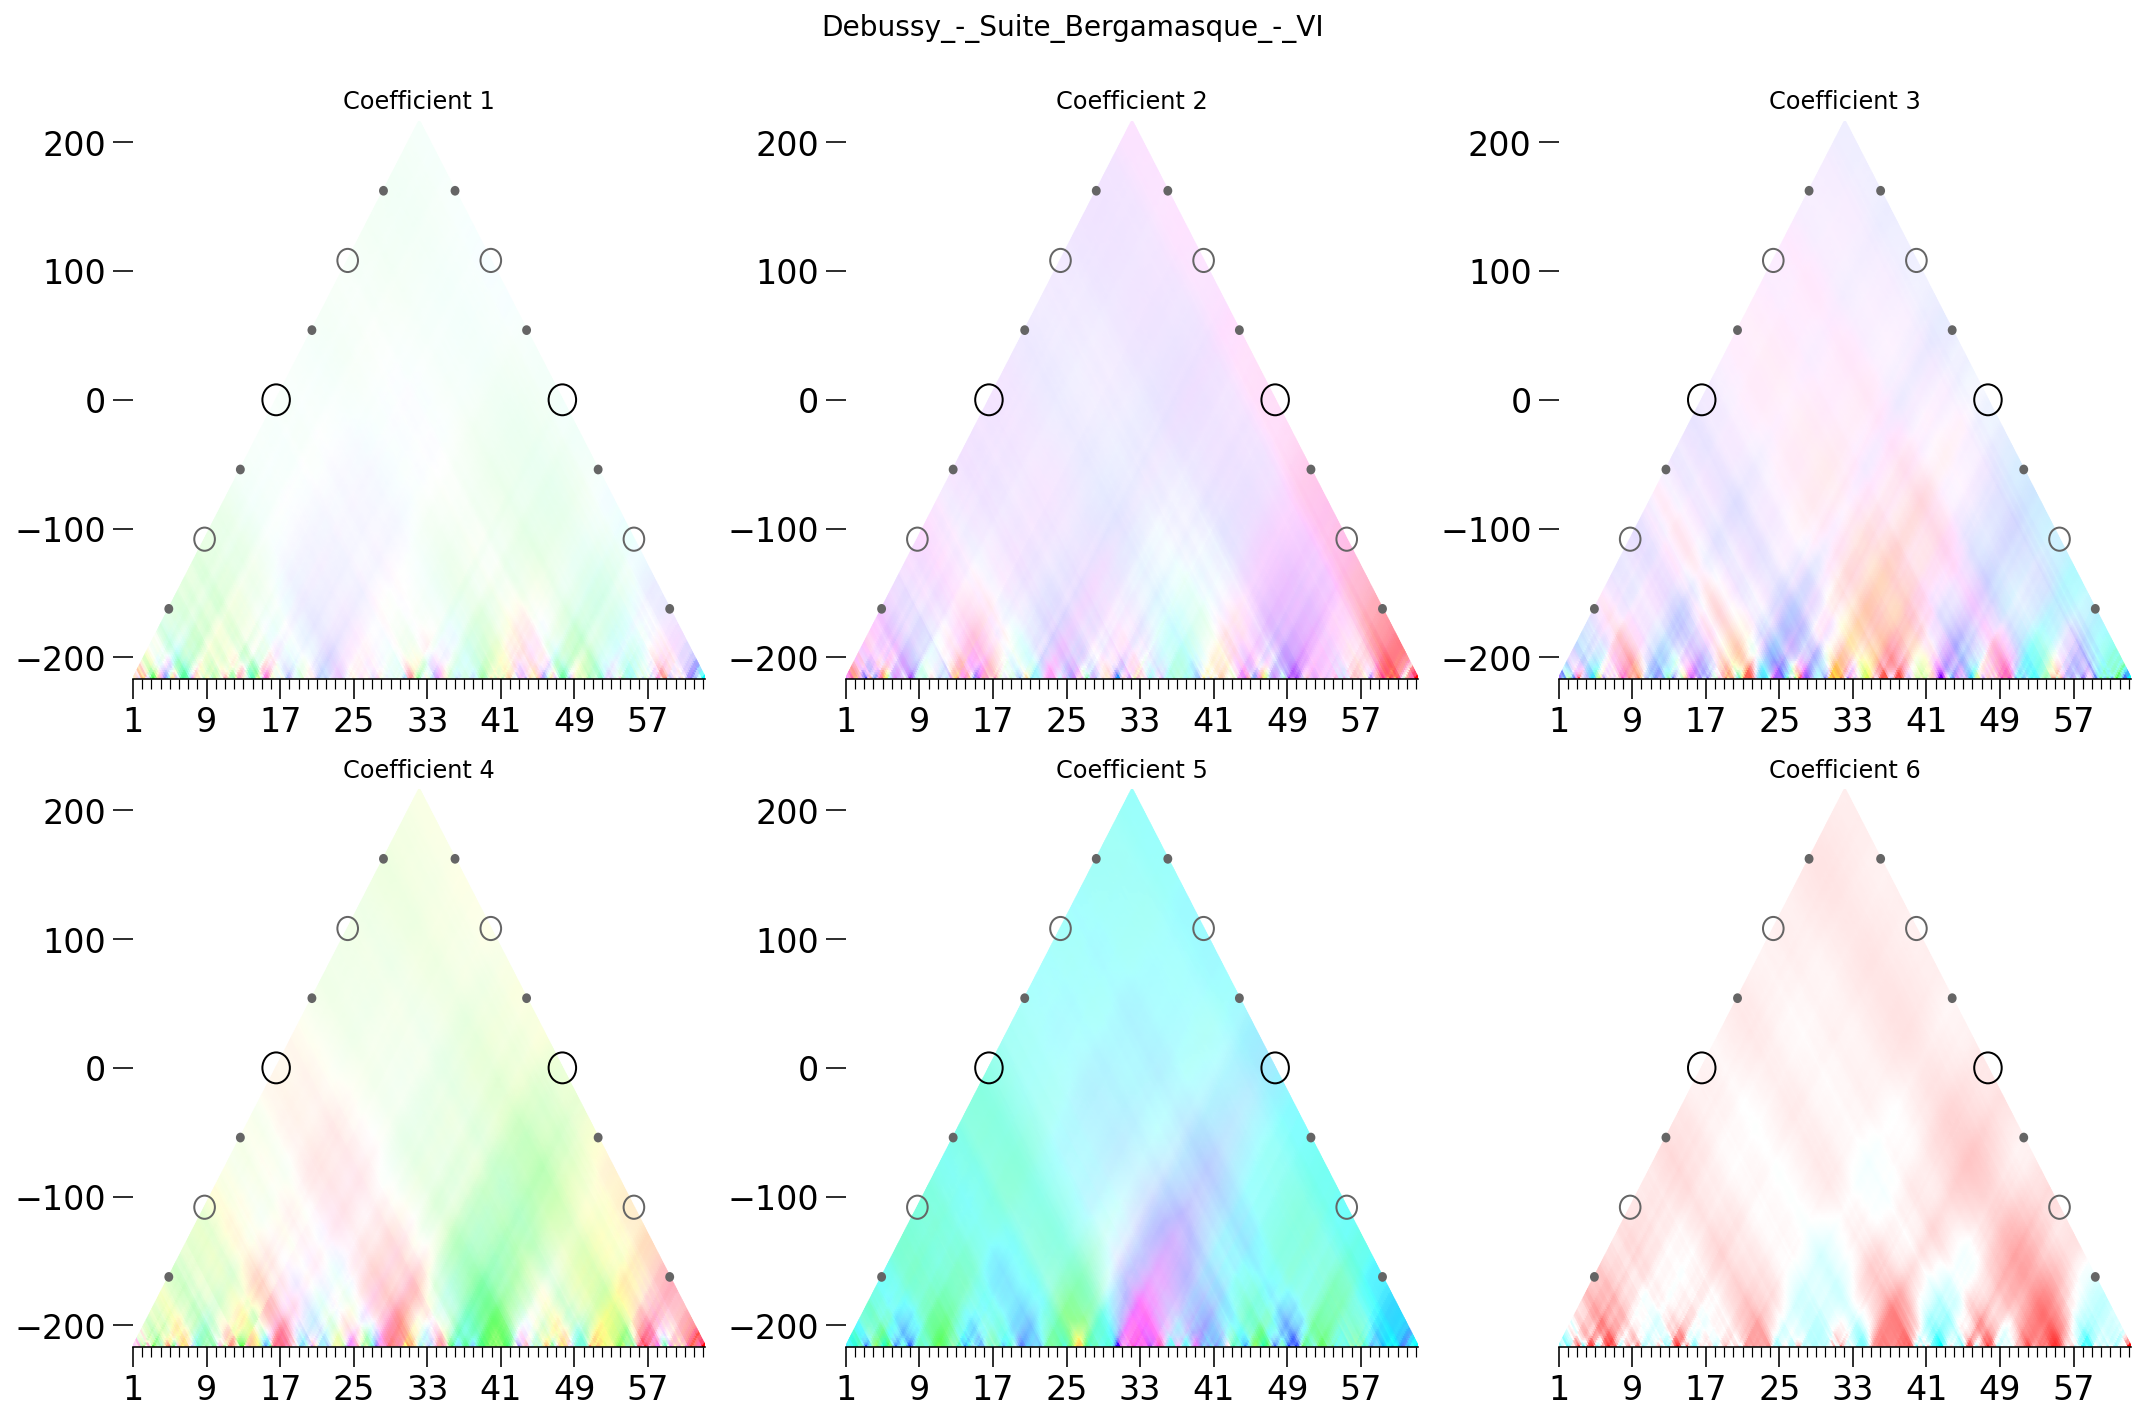

In [ ]:
import glob
from wavescapes import *
import matplotlib.pyplot as plt

scores = glob.glob("./scores/*.mid")

for score in scores:
    print(str(score.split('\\')[-1].split('.')[0]))
    if 'images' in score:
        pc_mat = produce_pitch_class_matrix_from_filename(filepath=score, aw_size=4)
    else:
        pc_mat = produce_pitch_class_matrix_from_filename(filepath=score, aw_size=2.5)
    
    fourier_mat = apply_dft_to_pitch_class_matrix(pc_mat)
    fig, axs = plt.subplots(2,3, figsize=(15,10))
    plt.suptitle(str(score.split('\\')[-1].split('.')[0]) + '\n', fontsize=14)
    axs = axs.flatten()
    for i in range(6):
        axs[i].set_title('Coefficient ' + str(i+1))
        coeff_mat = complex_utm_to_ws_utm(fourier_mat, coeff=i+1)
        ws = Wavescape(coeff_mat, pixel_width=500)
        ws.draw(tick_ratio=4, ax=axs[i])
    plt.savefig('./figures/' + str(score.split('\\')[-1].split('.')[0]) + '.png')

To better interpret the plots:
1. The distribution of magnitudes of the coefficients indicate which scales/chords are detected, as in 
![magnitude_1](figures/magnitude_1.png "Fig.1: Interpreting the magnitude of the coefficients")


2. The color of wavescapes indicates the keys, as in 
![color_1](figures/color_1.png "Fig.2: Interpreting the colors of the plot")
